In [3]:
from datetime import date, datetime, time, timedelta
import pysrt
from textblob import TextBlob
import matplotlib 
from matplotlib import style
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(16.0,9.0)
style.use('fivethirtyeight')

In [5]:
file='/home/berhe/Desktop/Thesis_git/TLP_thesis/subtitles/GoT/English/GameOfThrones.Season01.Episode01.en.srt'
subs=pysrt.open(file,encoding='iso-8859-1')

In [6]:
len(subs)

642

In [7]:
subs[100].text

'- ..King of the Andals and the First Men...\n- Father will know if you do.'

In [8]:
def create_intervals(start, end, delta):
    current=start
    while current<=end:
        current=(datetime.combine(date.today(),current)+delta).time()
        yield current

In [9]:
def sentiment_anal(file=file, delta=2):
    subs=pysrt.open(file,encoding='iso-8859-1')
    n=len(subs)
    intervals=[]
    start=time(0,0,0)
    end=subs[-1].end.to_time()
    delta=timedelta(minutes=delta)
    for results in create_intervals(start, end, delta):
        intervals.append(results)
        
    sentiments=[]
    index=0
    m=len(intervals)
    for i in range(m):
        text=""
        for j in range(index,n):
            if subs[j].end.to_time()<intervals[i]:
                text+=subs[j].text_without_tags + " "
            else:
                break
        blob=TextBlob(text)
        pol=blob.sentiment.polarity
        sentiments.append(pol)
        index =j
    intervals.insert(0,time(0,0,0))
    sentiments.insert(0,0.0)
    #for k in range(0,n):
        #print(intervals[k])
        #print(subs[k].text)
    return (intervals, sentiments,text)

In [30]:
_,_,bl=sentiment_anal(file)

In [31]:
len(bl)

384

In [32]:
strings=bl.encode('ascii', 'ignore').decode('ascii')

In [33]:
import nltk

In [34]:
tokens=nltk.word_tokenize(bl,language='english',preserve_line=False)

In [35]:
tokens

['Come',
 'on',
 ',',
 'you',
 '.',
 '(',
 'Whines',
 ')',
 '(',
 'Grunts',
 ')',
 '(',
 'Barks',
 'softly',
 ')',
 '(',
 'Woman',
 'gasping',
 ')',
 '(',
 'Woman',
 'moaning',
 ')',
 '(',
 'Grunting',
 ',',
 'moaning',
 ')',
 '(',
 'Gasps',
 ')',
 '-',
 'Stopl',
 'Stop',
 '.',
 '-',
 '(',
 'Gasm',
 ')',
 'Are',
 'you',
 'completely',
 'mad',
 '?',
 '-',
 'He',
 'saw',
 'us',
 '.',
 '-',
 'It',
 "'s",
 'all',
 'ï¬\x81ght',
 ',',
 'it',
 "'s",
 'all',
 'right',
 '.',
 '-',
 'It',
 "'s",
 'all',
 'right',
 '.',
 '-',
 'He',
 'saw',
 'usl',
 'I',
 'heard',
 'you',
 'the',
 'ï¬\x81rst',
 'time',
 '.',
 '(',
 'Whimpers',
 ')',
 'Quite',
 'the',
 'little',
 'climber',
 ',',
 'are',
 "n't",
 'you',
 '?',
 '-',
 'How',
 'old',
 'are',
 'you',
 ',',
 'boy',
 '?',
 '-',
 'Ten',
 '.',
 'Ten',
 '.',
 '-',
 'The',
 'things',
 'I',
 'do',
 'for',
 'love',
 '.',
 '-',
 '(',
 'Gasm',
 ')']

In [36]:
tagged=nltk.pos_tag(tokens)

In [37]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

NameError: name 'reload' is not defined

In [38]:
tagged[0:4]

[('Come', 'NNP'), ('on', 'IN'), (',', ','), ('you', 'PRP')]

In [39]:
for tag in tagged:
    if tag[1] in ['NNPS','NNP']:
        print (tag)

('Come', 'NNP')
('Whines', 'NNPS')
('Grunts', 'NNPS')
('Barks', 'NNP')
('Woman', 'NNP')
('Woman', 'NNP')
('Gasps', 'NNP')
('Stop', 'NNP')
('Gasm', 'NNP')
('Whimpers', 'NNPS')
('Ten', 'NNP')
('Gasm', 'NNP')


In [40]:
entities=nltk.chunk.ne_chunk(tagged)

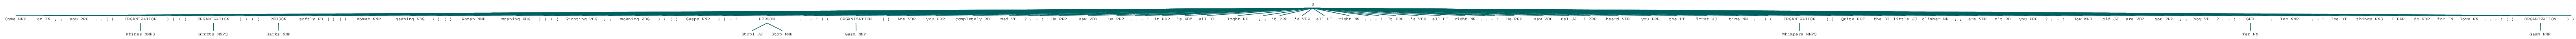

In [41]:
entities

In [42]:
names=bl

In [44]:
for n in names:
    print (n)

C
o
m
e
 
o
n
,
 
y
o
u
.
 
(
W
h
i
n
e
s
)
 
(
G
r
u
n
t
s
)
 
(
B
a
r
k
s
 
s
o
f
t
l
y
)
 
(
W
o
m
a
n
 
g
a
s
p
i
n
g
)
 
(
W
o
m
a
n
 
m
o
a
n
i
n
g
)
 
(
G
r
u
n
t
i
n
g
,
 
m
o
a
n
i
n
g
)
 
(
G
a
s
p
s
)
 
-
 
S
t
o
p
l
 
S
t
o
p
.


-
 
(
G
a
s
m
)
 
A
r
e
 
y
o
u
 
c
o
m
p
l
e
t
e
l
y
 
m
a
d
?
 
-
 
H
e
 
s
a
w
 
u
s
.


-
 
I
t
'
s
 
a
l
l
 
ï
¬

g
h
t
,
 
i
t
'
s
 
a
l
l
 
r
i
g
h
t
.
 
-
 
I
t
'
s
 
a
l
l
 
r
i
g
h
t
.


-
 
H
e
 
s
a
w
 
u
s
l
 
I
 
h
e
a
r
d
 
y
o
u
 
t
h
e
 
ï
¬

r
s
t
 
t
i
m
e
.
 
(
W
h
i
m
p
e
r
s
)
 
Q
u
i
t
e
 
t
h
e
 
l
i
t
t
l
e
 
c
l
i
m
b
e
r
,
 
a
r
e
n
'
t
 
y
o
u
?
 
-
 
H
o
w
 
o
l
d
 
a
r
e
 
y
o
u
,
 
b
o
y
?


-
 
T
e
n
.
 
T
e
n
.
 
-
 
T
h
e
 
t
h
i
n
g
s
 
I
 
d
o
 
f
o
r
 
l
o
v
e
.


-
 
(
G
a
s
m
)
 


In [45]:
entities=nltk.chunk.ne_chunk(names)

IndexError: string index out of range

In [46]:
strings=[]
for i in bl.sentences:
    strings.append(i.encode('utf-8').strip())
len(strings)

AttributeError: 'str' object has no attribute 'sentences'

In [47]:
strings

[]

In [48]:
import nltk
tokens=nltk.word_tokenize(bl.sentences)
tagged=nltk.pos_tag(tokens)
ent=nltk.chunk.ne_chunk(tagged)

AttributeError: 'str' object has no attribute 'sentences'

In [49]:
def average_sentiment(y):
    avg=float(sum(y))/len(y)
    return avg

TypeError: float() argument must be a string or a number, not 'datetime.time'

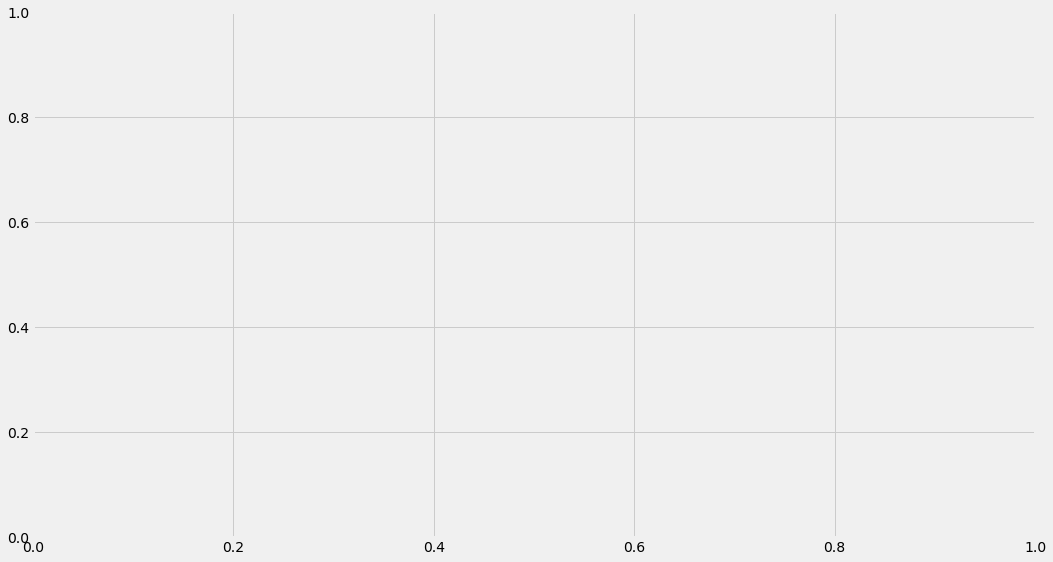

In [51]:
x,y,_=sentiment_anal(file)
fig,ax=plt.subplots(squeeze=False)
plt.plot(x,y)
plt.title("Game of Thrones season 1 Episode 1",fontsize=32)
plt.ylim((-1,1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("running time")
plt.text(.5, 1.00, "Avg Sen " + str(round(average_sentiment(y),4)),color="red")
ttl=ax.title
ttl.set_position(.5, 1.05)